In [53]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('classic')
import numpy as np
# plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams['figure.figsize'] = [15, 15]
# plt.rcParams['figure.figsize'] = [10, 10]
import sys

In [97]:
matrix = np.load('accs/a-0.npy')

In [84]:
matrix = np.vstack((
    np.load('accs/a-1.npy'),
    np.load('accs/a-2.npy'),
    np.load('accs/a-3.npy'),
    np.load('accs/a-4.npy'),
    np.load('accs/a-5.npy')
))
matrix.shape

(1000, 43520)

In [85]:
# TEMP SHORT IMPULSES
# yaroslav_turovsk@mail.ru :
# время можно не уменьшать. надо просто взять фрагмент накопленного сигнала.
matrix = matrix[:, 1700:5000]
matrix.shape

(1000, 3300)

In [4]:
# plt.plot(matrix[300], linewidth=0.1)
# plt.plot(matrix[301], linewidth=0.1)
# plt.plot(matrix[302], linewidth=0.1)
# plt.plot(matrix[303], linewidth=0.1)
# plt.plot(matrix[304], linewidth=0.1)
# plt.plot(matrix[305], linewidth=0.1)

In [113]:
# plt.imshow(matrix, aspect='auto', cmap='viridis')
# plt.savefig('accs/pics/matrix.png')
with open('px.png', 'wb') as file:
    plt.imsave(file, matrix, cmap='viridis', origin='lower')

In [88]:
mean_10    = np.mean(matrix[:  10], axis=0)
mean_100   = np.mean(matrix[: 100], axis=0)
mean_400   = np.mean(matrix[: 400], axis=0)
mean_600   = np.mean(matrix[: 600], axis=0)
mean_1000  = np.mean(matrix[:1000], axis=0)

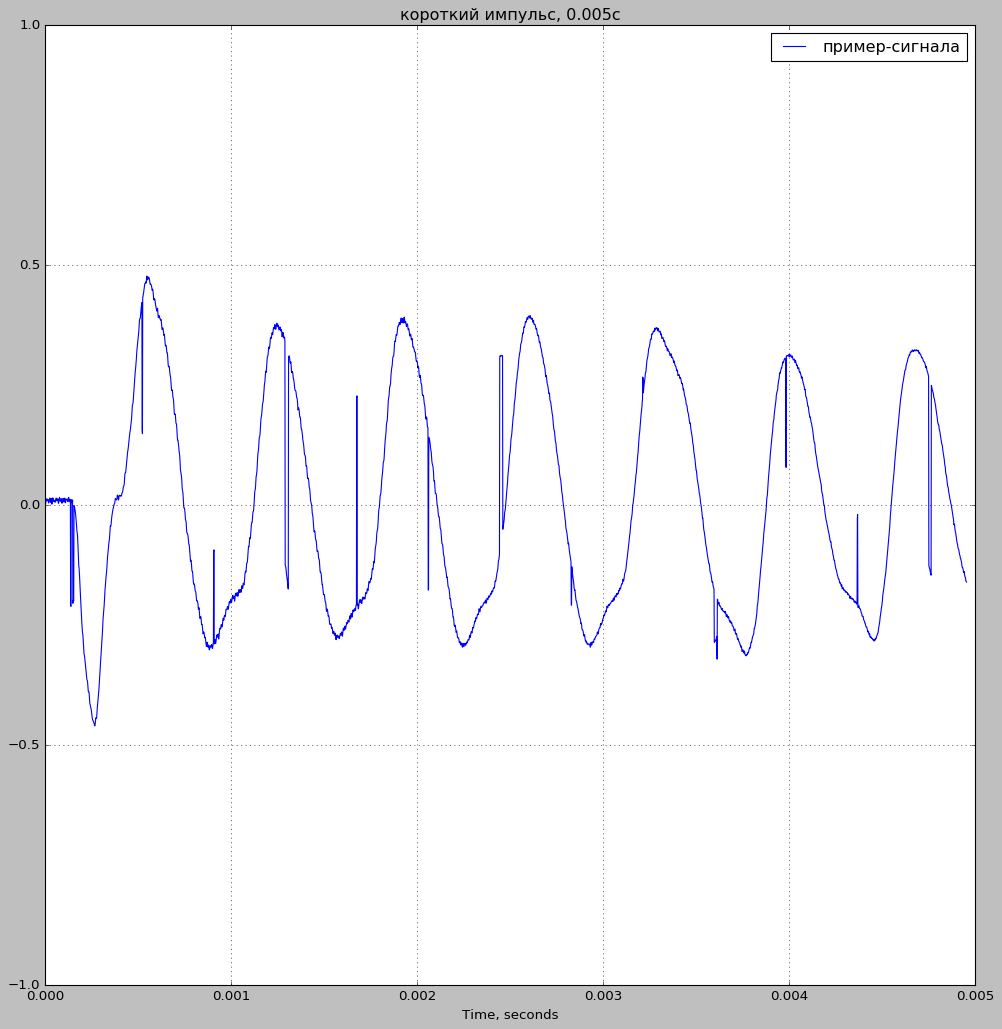

In [121]:
signal = matrix[180]
plt.ylim(-1, 1)
plt.grid()
rate = 666000
t = np.linspace(0, matrix.shape[1] / rate, matrix.shape[1])
plt.plot(t, signal, label='пример-сигнала')
plt.legend()
plt.title('короткий импульс, 0.005c')
plt.xlabel('Time, seconds')
plt.savefig('accs/pics/пример-сигнала.png', transparent=True)

In [90]:
def find_ref_magn(arrays):
    max_magnitudes = []
    n = len(arrays[0])
    for x in arrays:
        a = np.fft.rfft(x)
        magnitude = np.abs(a) / n
        max_magnitudes.append(magnitude.max())
    return max(max_magnitudes)

In [91]:
arrays = [
    mean_10  ,
    mean_100 ,
    mean_400 ,
    mean_600 ,
    mean_1000,
]
ref_magnitude = find_ref_magn(arrays)
ref_magnitude

0.08432403560827317

In [92]:
def fft(x):
    n = len(x)
    a = np.fft.rfft(x)
    magnitude = np.abs(a) / n
    a_db = 20 * np.log10(magnitude / ref_magnitude)
    return a_db

In [93]:
fft_10   = fft(mean_10)
fft_100  = fft(mean_100)
fft_400  = fft(mean_400)
fft_600  = fft(mean_600)
fft_1000 = fft(mean_1000)

In [94]:
rate = 666000
n = len(mean_10)
print(n)
f = np.fft.rfftfreq(n, d = 1. / rate)

3300


In [95]:
# plt.grid(b=True, which='major')
# plt.grid(b=True, which='minor')
# plt.tight_layout()
# plt.ylim(-100, 0)
# plt.semilogx(f,   fft_10, 'b', label='10')
# plt.semilogx(f,  fft_100, 'r', label='100')
# plt.semilogx(f,  fft_400, 'g', label='400')
# plt.semilogx(f,  fft_600, 'm', label='600')
# plt.semilogx(f, fft_1000, 'k', label='1000')
# plt.legend()
# plt.savefig('accs/pics/600-1000.png')

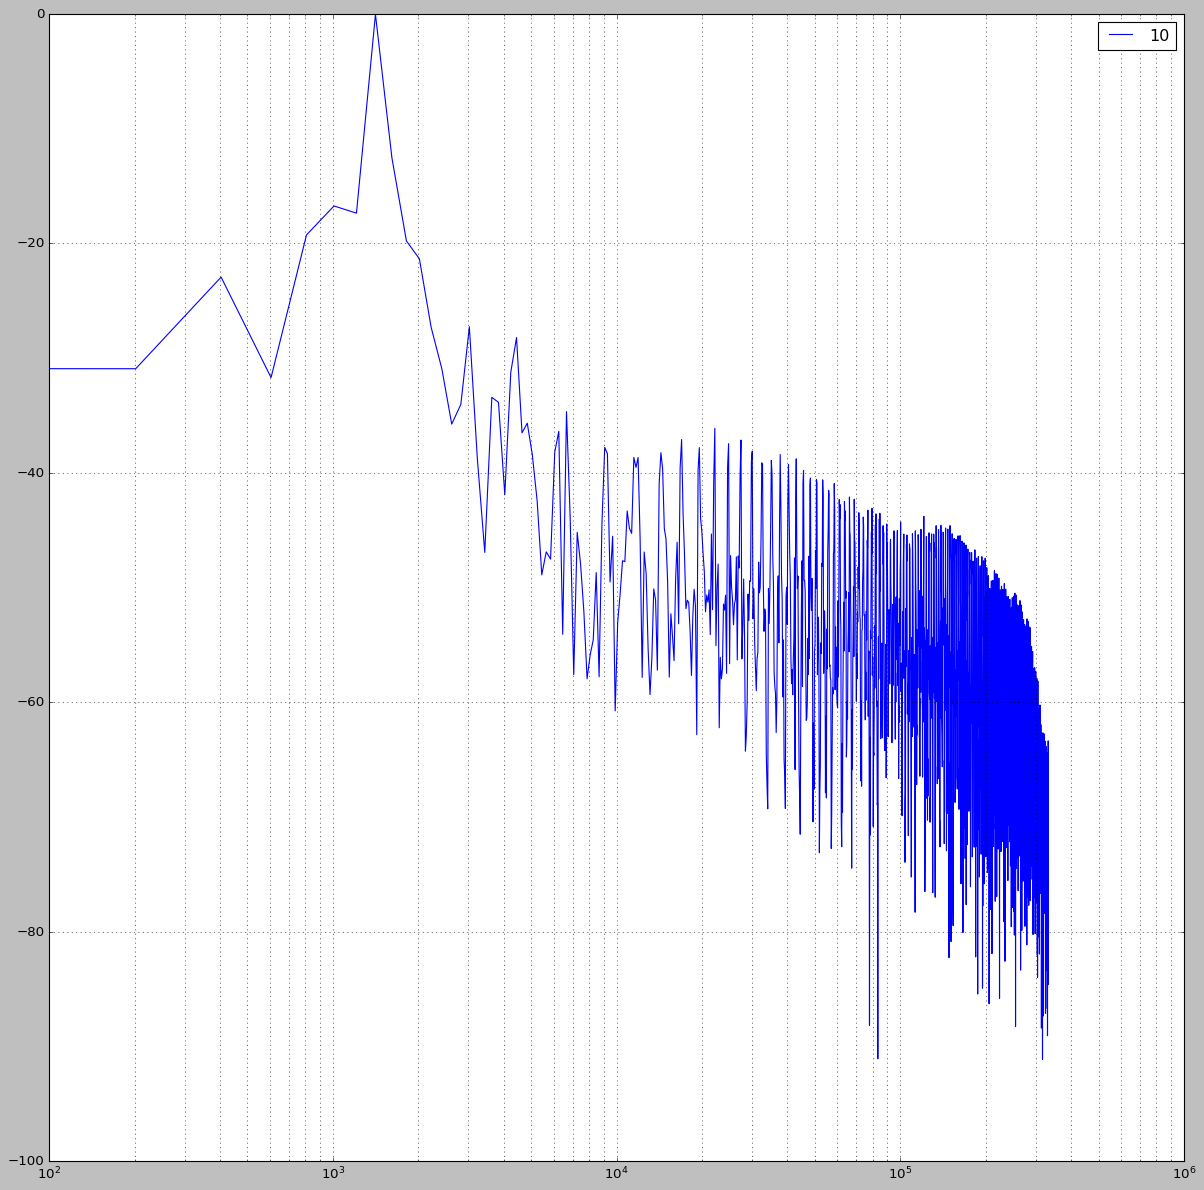

In [96]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,   fft_10, 'b', label='10')
plt.legend()
plt.savefig('accs/pics/10.png')

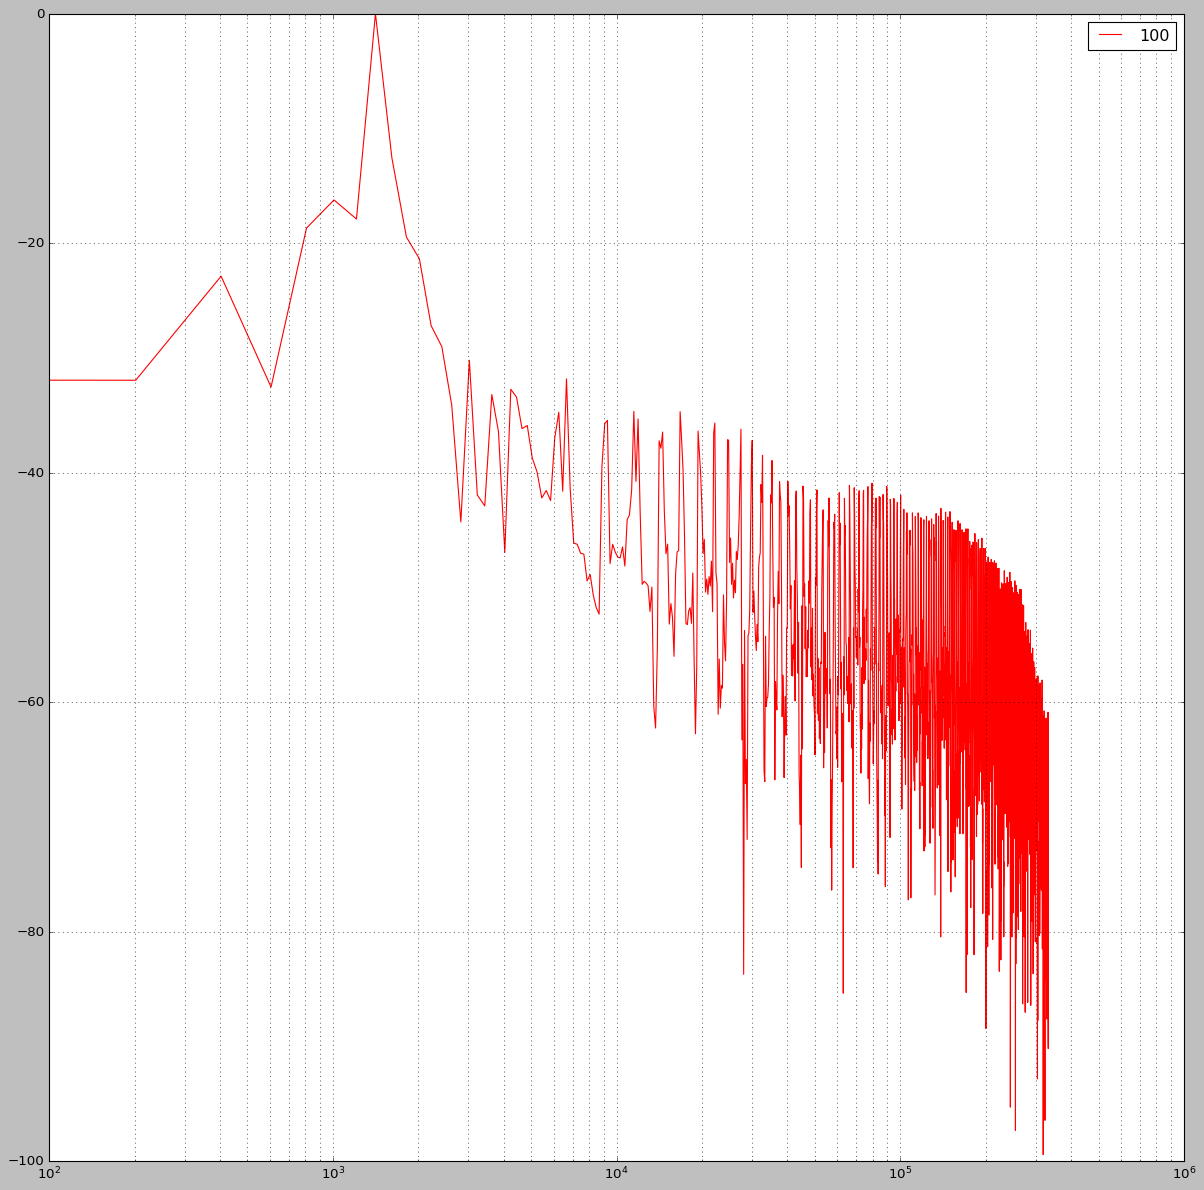

In [97]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_100, 'r', label='100')
plt.legend()
plt.savefig('accs/pics/100.png')

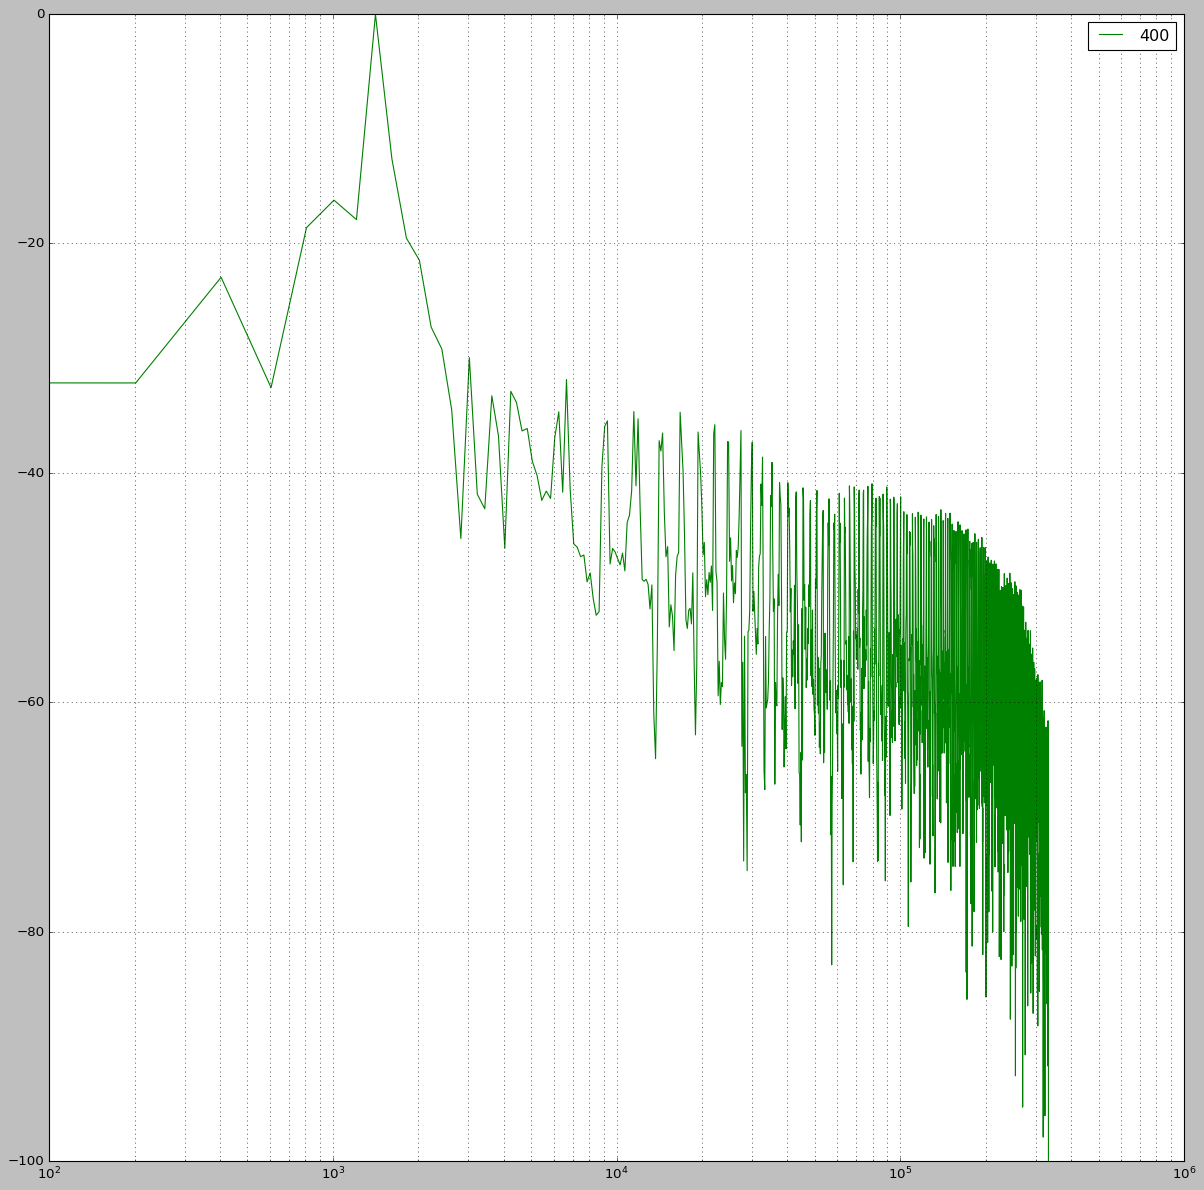

In [98]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_400, 'g', label='400')
plt.legend()
plt.savefig('accs/pics/400.png')

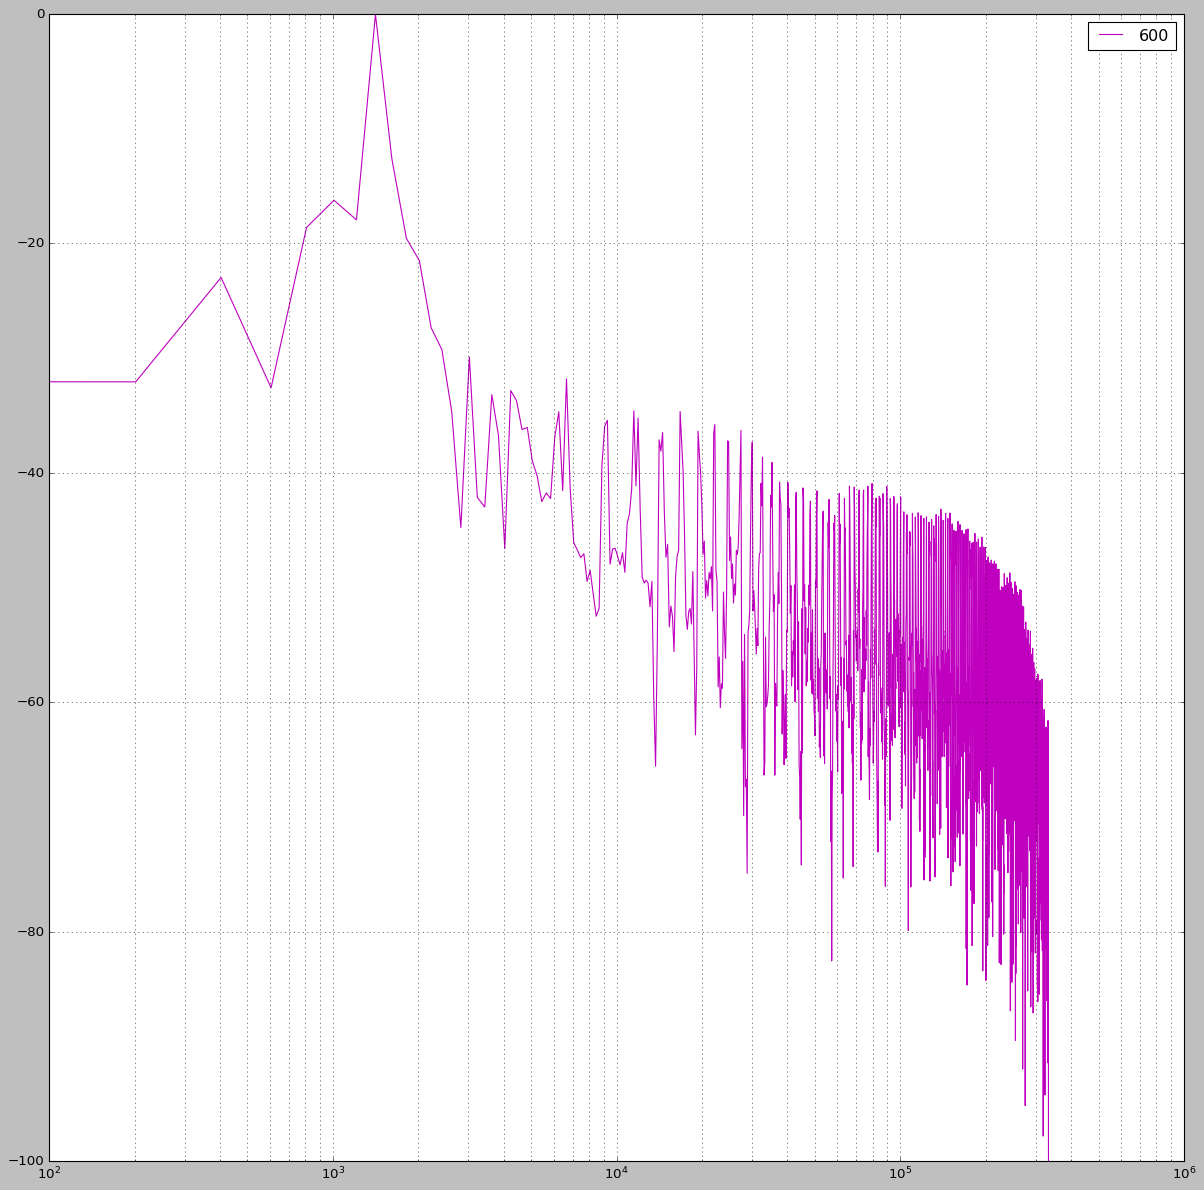

In [99]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_600, 'm', label='600')
plt.legend()
plt.savefig('accs/pics/600.png')

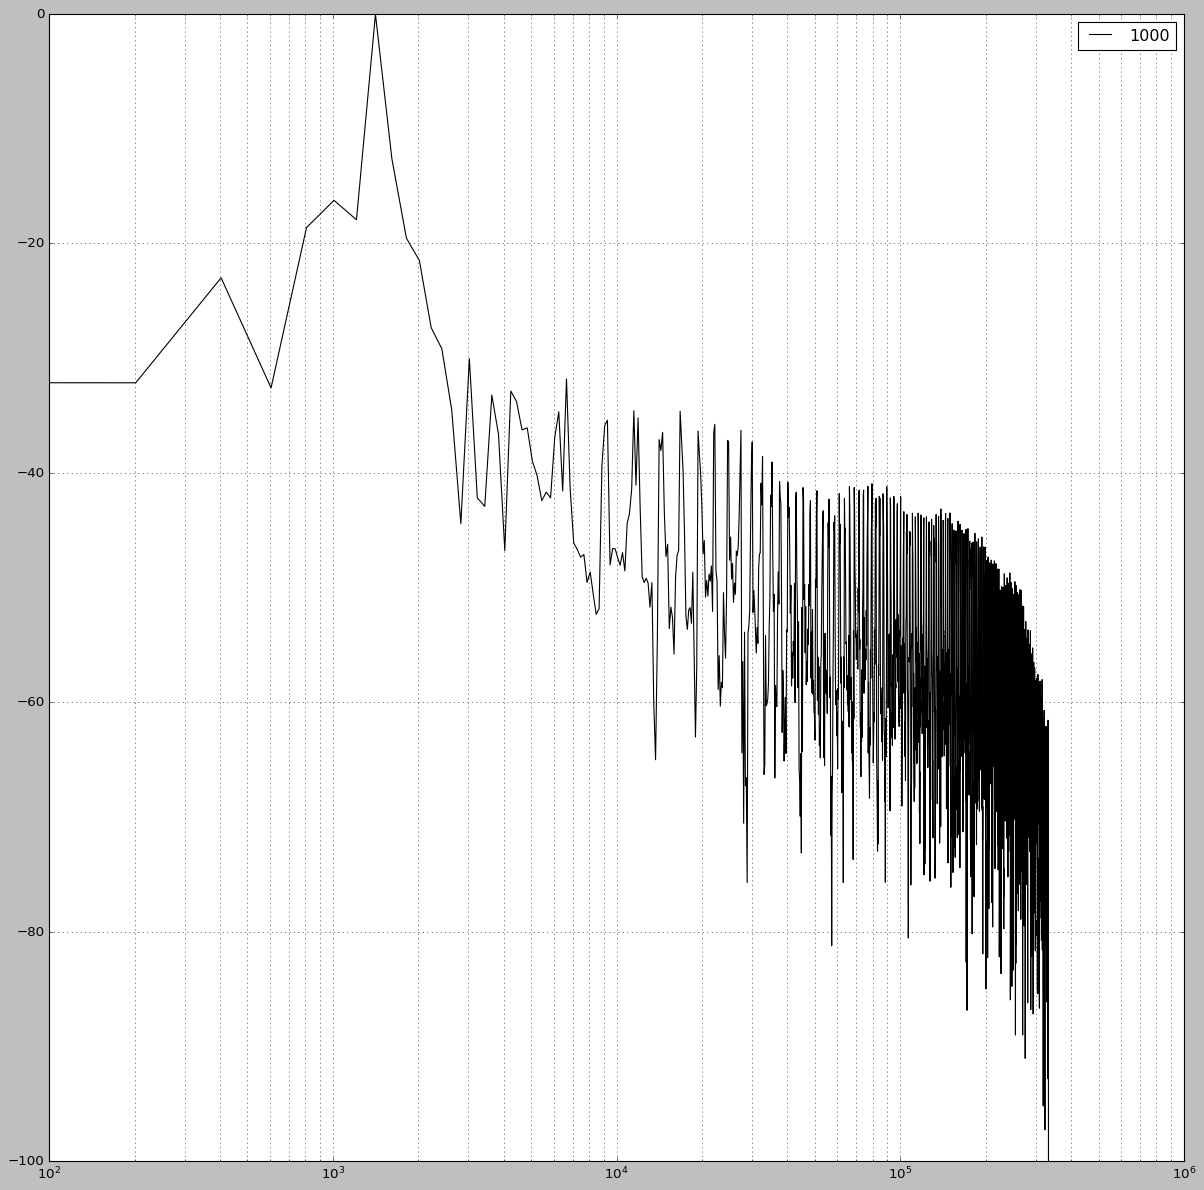

In [100]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f, fft_1000, 'k', label='1000')
plt.legend()
plt.savefig('accs/pics/1000.png')

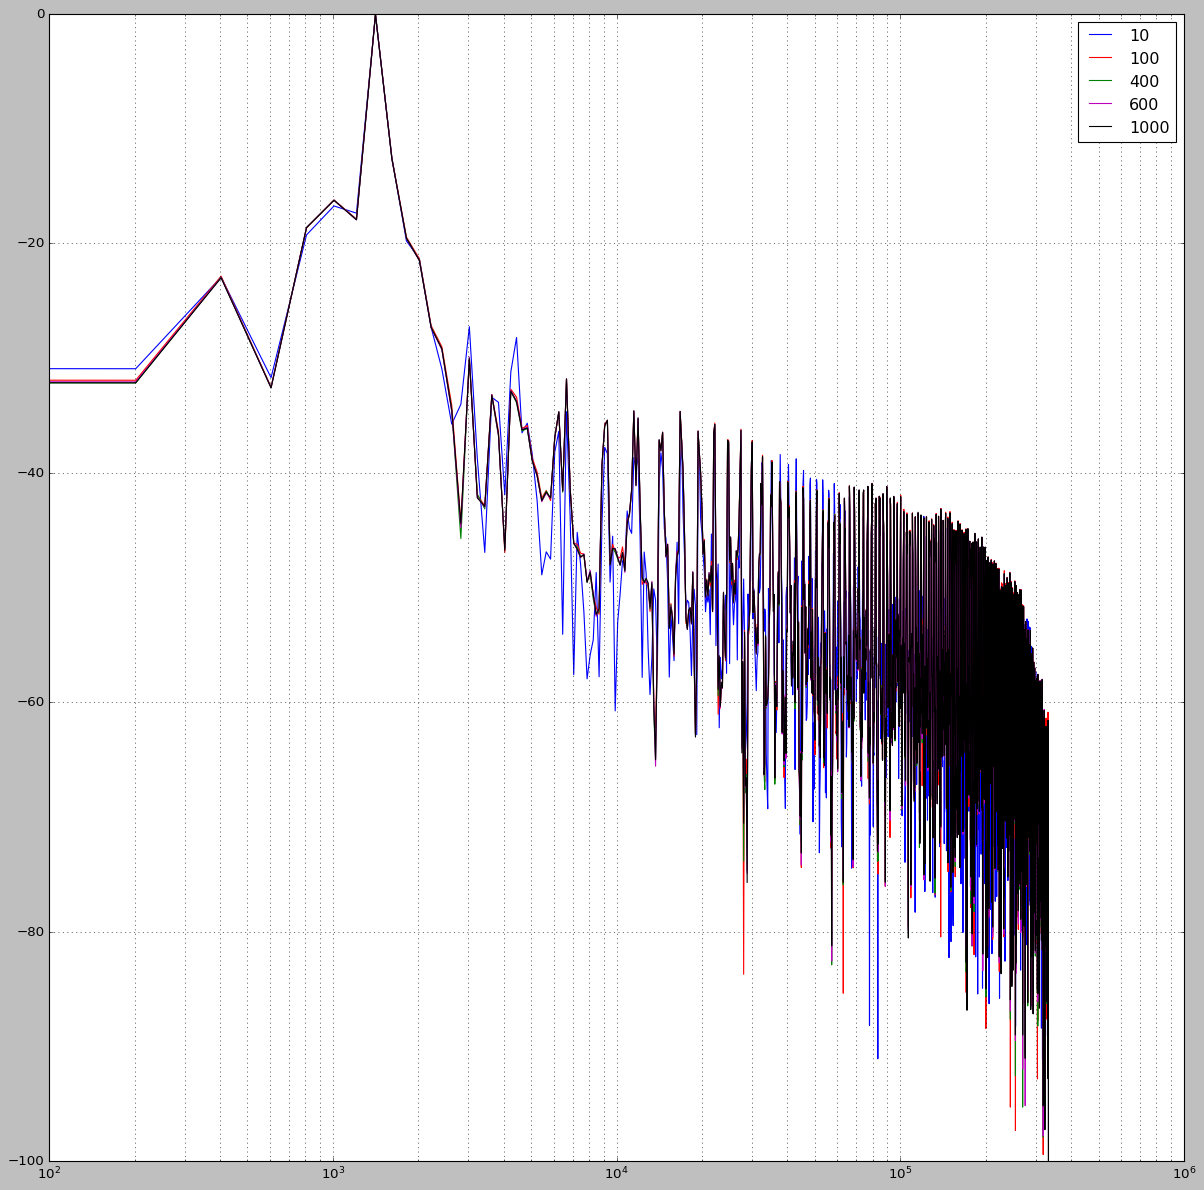

In [101]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,   fft_10, 'b', label='10')
plt.semilogx(f,  fft_100, 'r', label='100')
plt.semilogx(f,  fft_400, 'g', label='400')
plt.semilogx(f,  fft_600, 'm', label='600')
plt.semilogx(f, fft_1000, 'k', label='1000')
plt.legend()
plt.savefig('accs/pics/all.png')

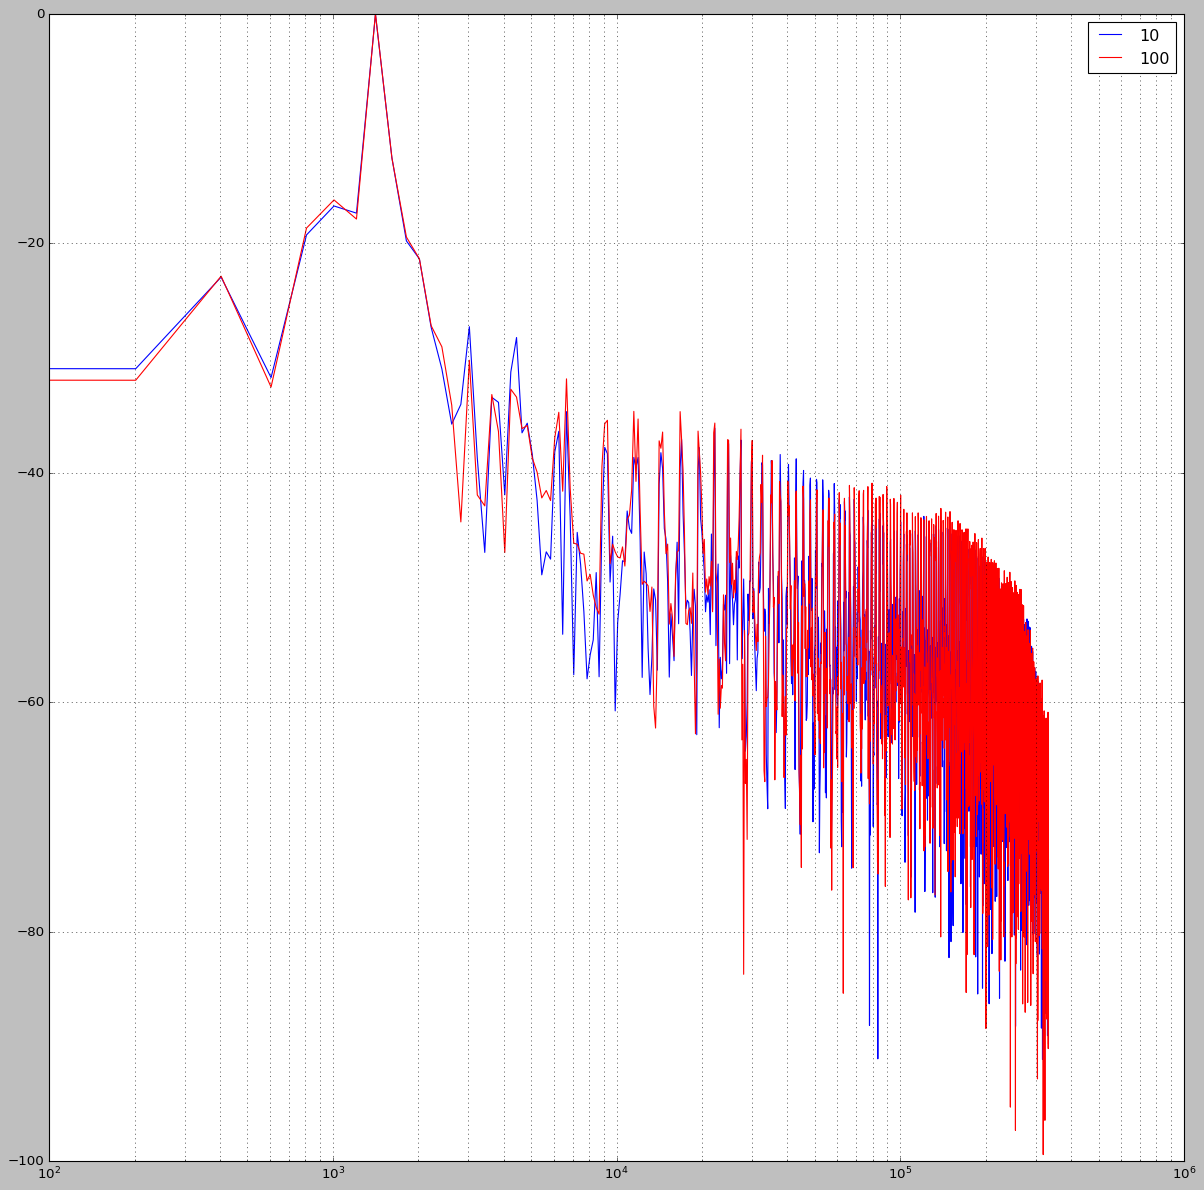

In [102]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,   fft_10, 'b', label='10')
plt.semilogx(f,  fft_100, 'r', label='100')
plt.legend()
plt.savefig('accs/pics/pairs/10-100.png')

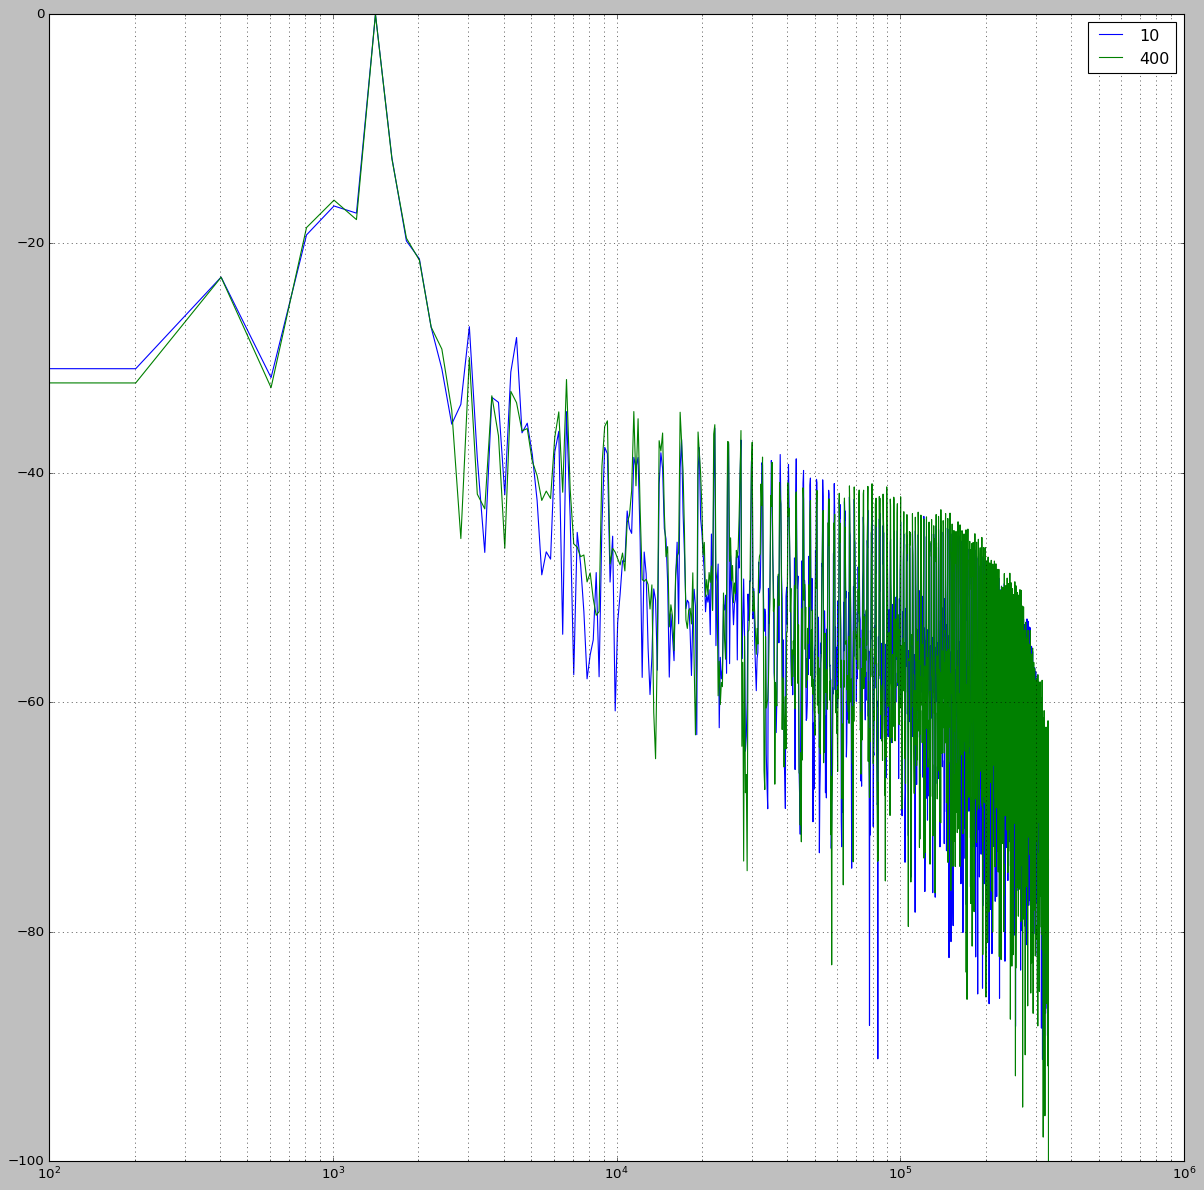

In [103]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,   fft_10, 'b', label='10')
plt.semilogx(f,  fft_400, 'g', label='400')
plt.legend()
plt.savefig('accs/pics/pairs/10-400.png')

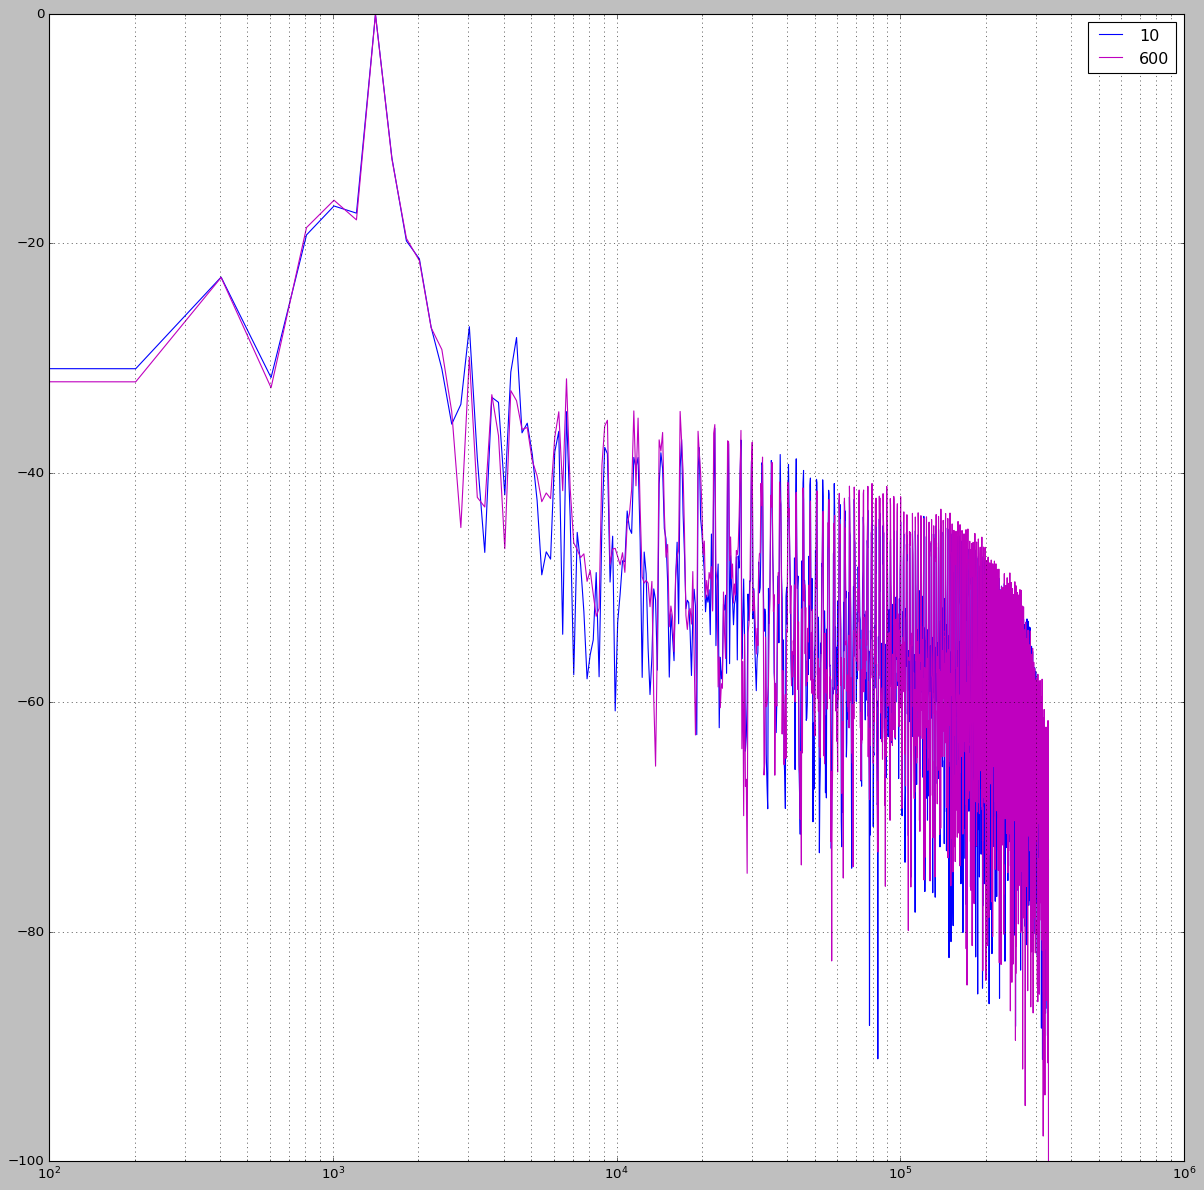

In [104]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,   fft_10, 'b', label='10')
plt.semilogx(f,  fft_600, 'm', label='600')
plt.legend()
plt.savefig('accs/pics/pairs/10-600.png')

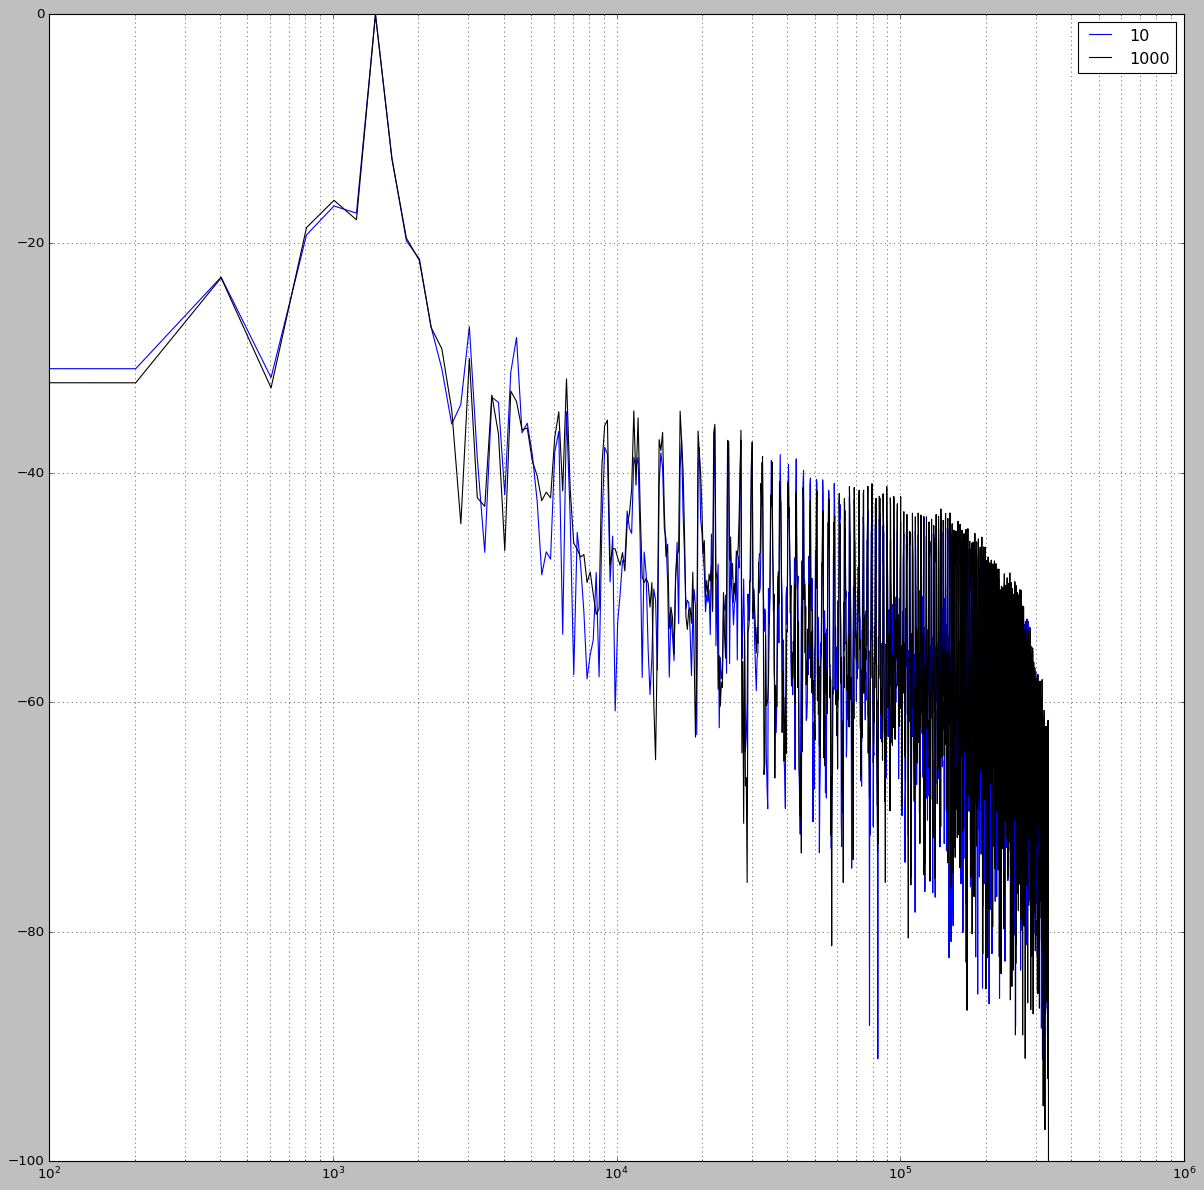

In [105]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,   fft_10, 'b', label='10')
plt.semilogx(f, fft_1000, 'k', label='1000')
plt.legend()
plt.savefig('accs/pics/pairs/10-1000.png')

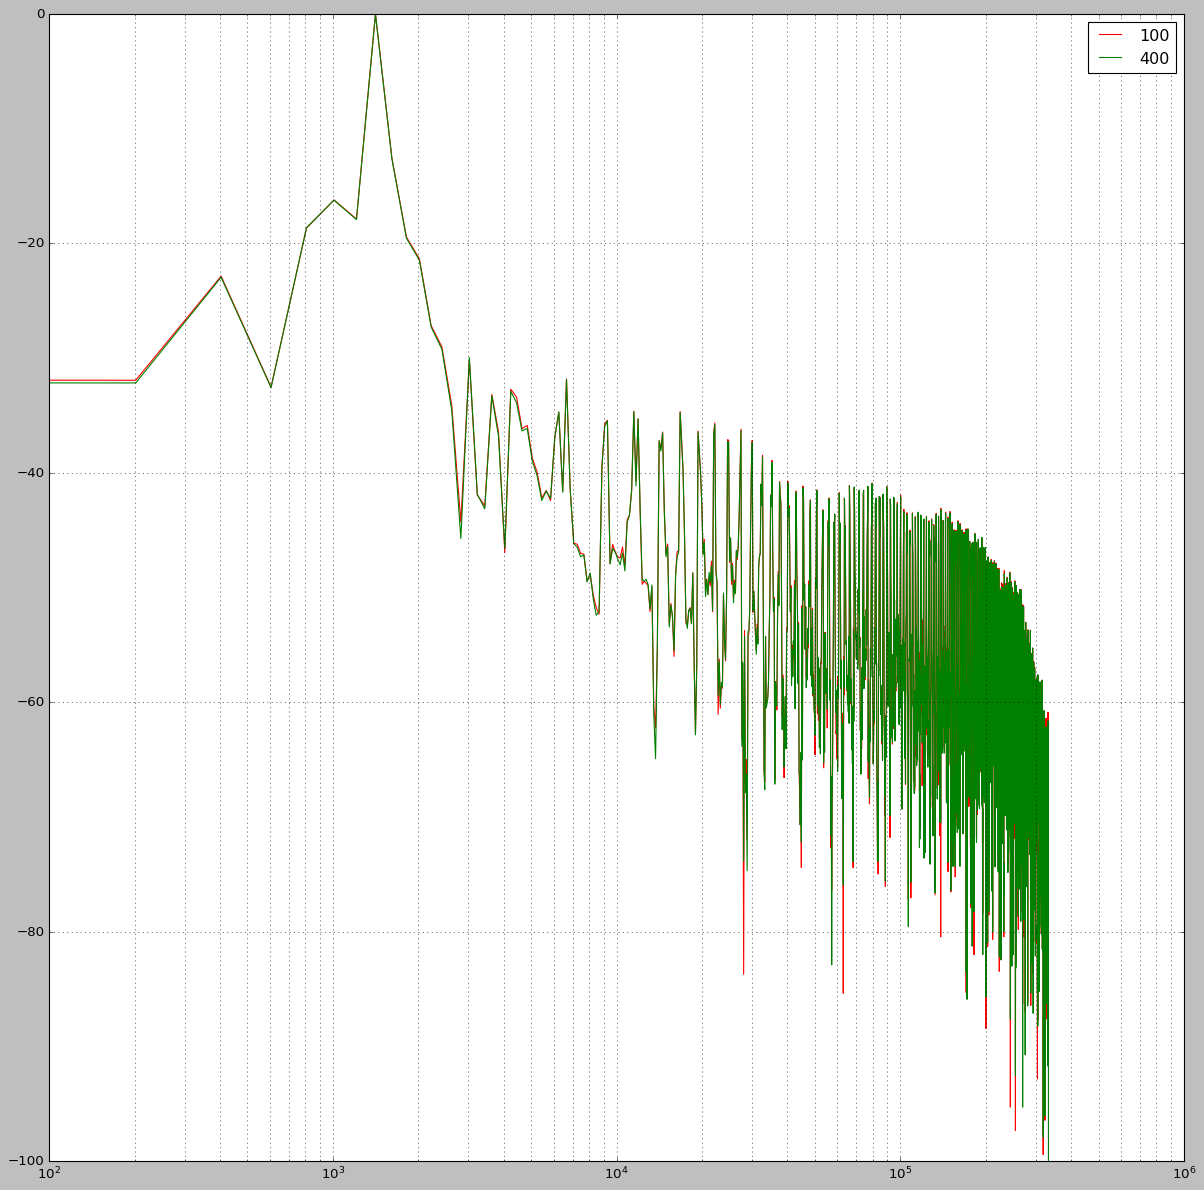

In [106]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_100, 'r', label='100')
plt.semilogx(f,  fft_400, 'g', label='400')
plt.legend()
plt.savefig('accs/pics/pairs/100-400.png')

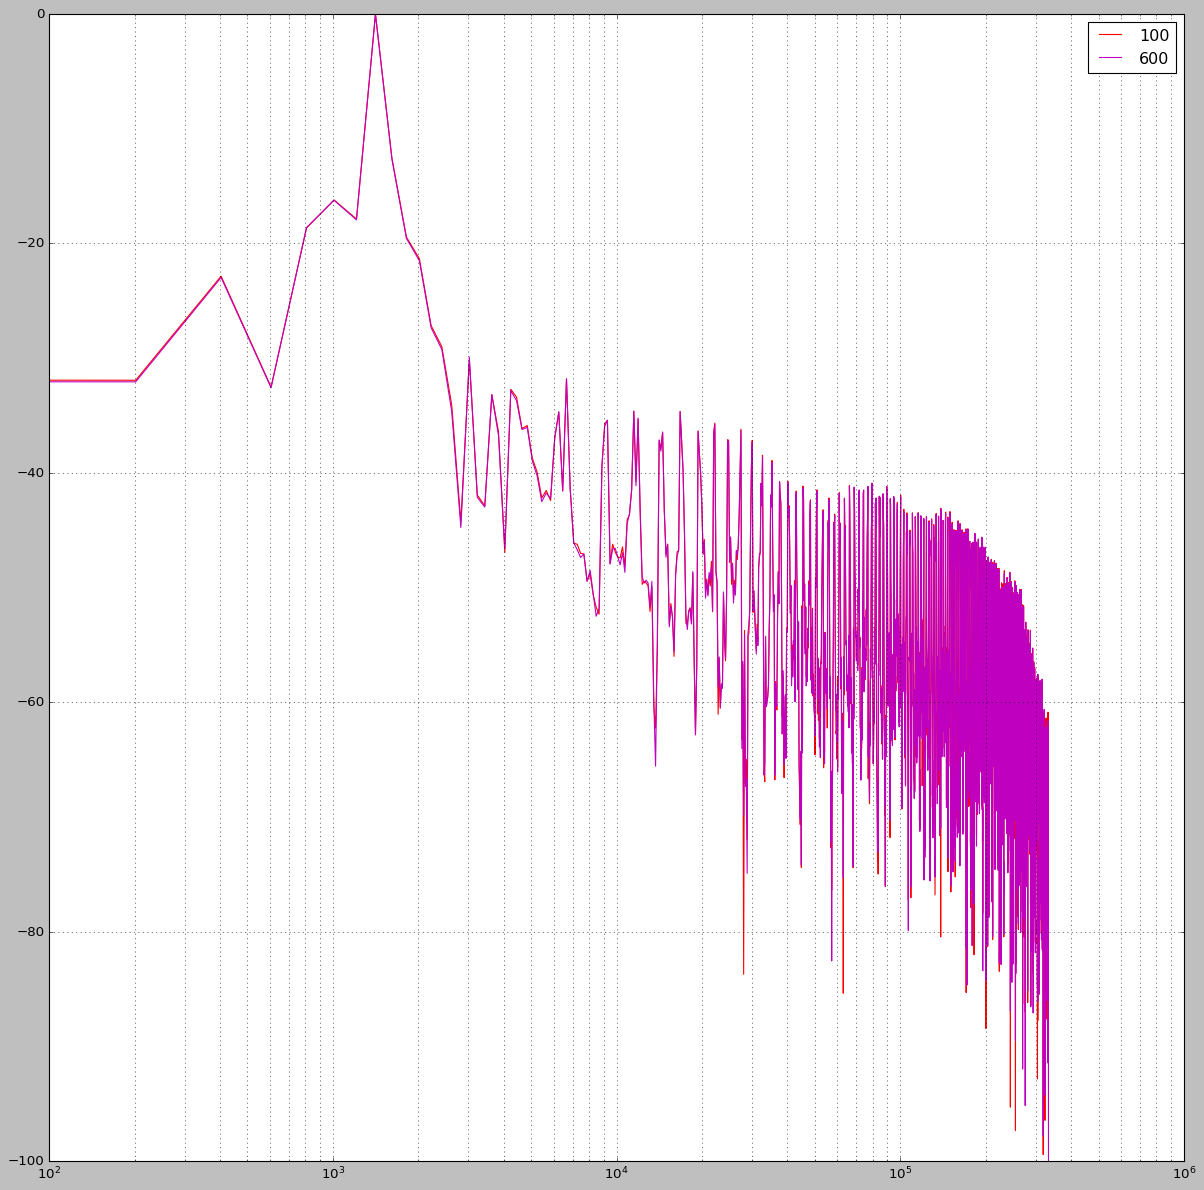

In [107]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_100, 'r', label='100')
plt.semilogx(f,  fft_600, 'm', label='600')
plt.legend()
plt.savefig('accs/pics/pairs/100-600.png')

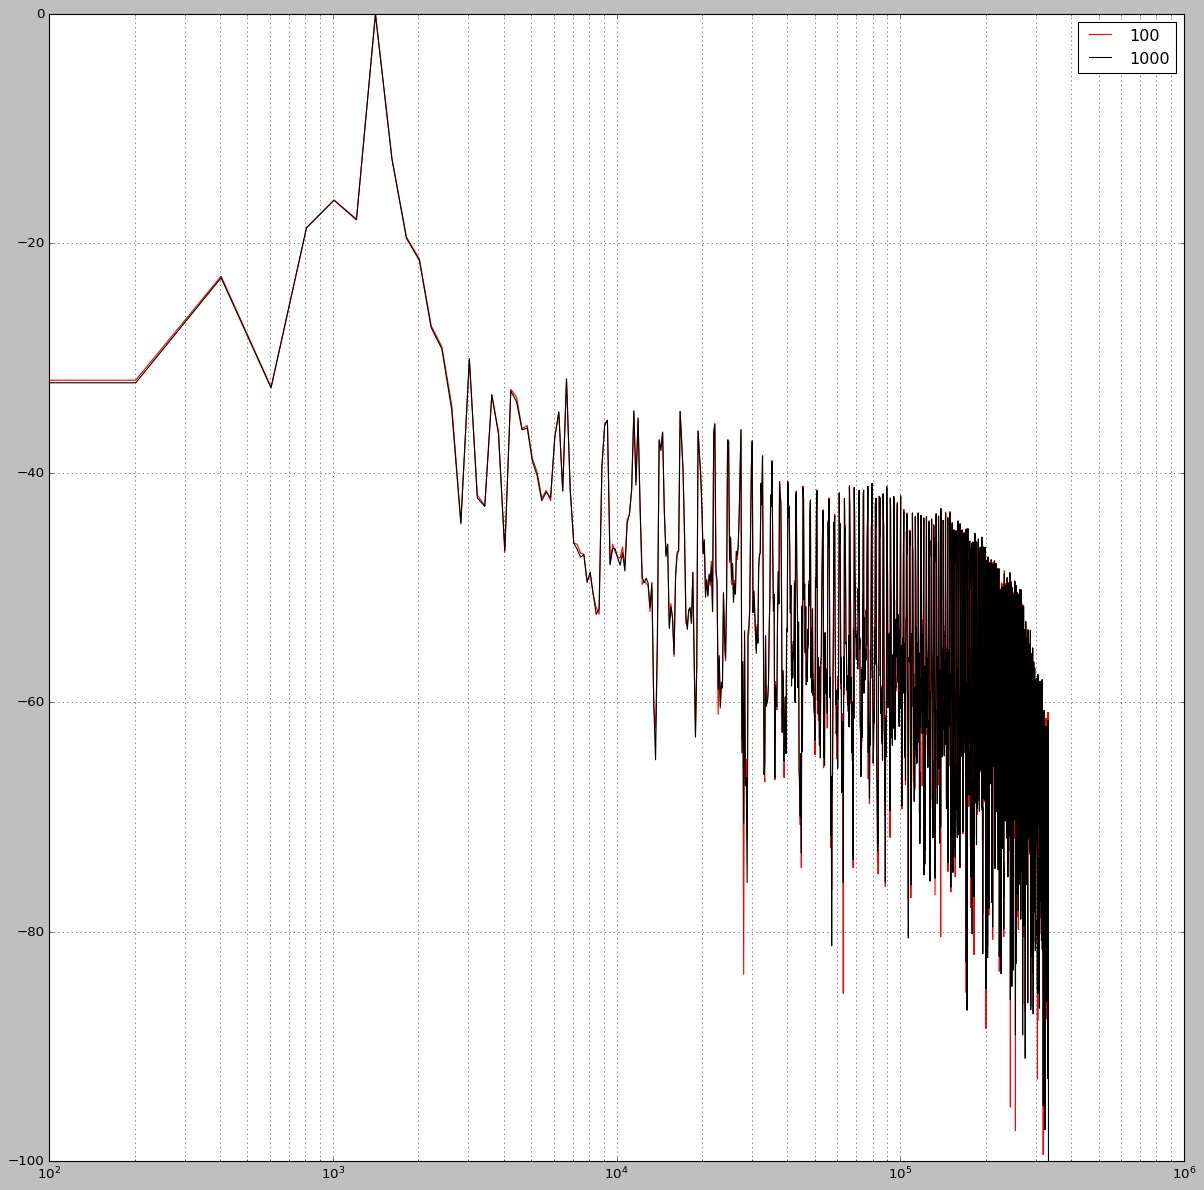

In [108]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_100, 'r', label='100')
plt.semilogx(f, fft_1000, 'k', label='1000')
plt.legend()
plt.savefig('accs/pics/pairs/100-1000.png')

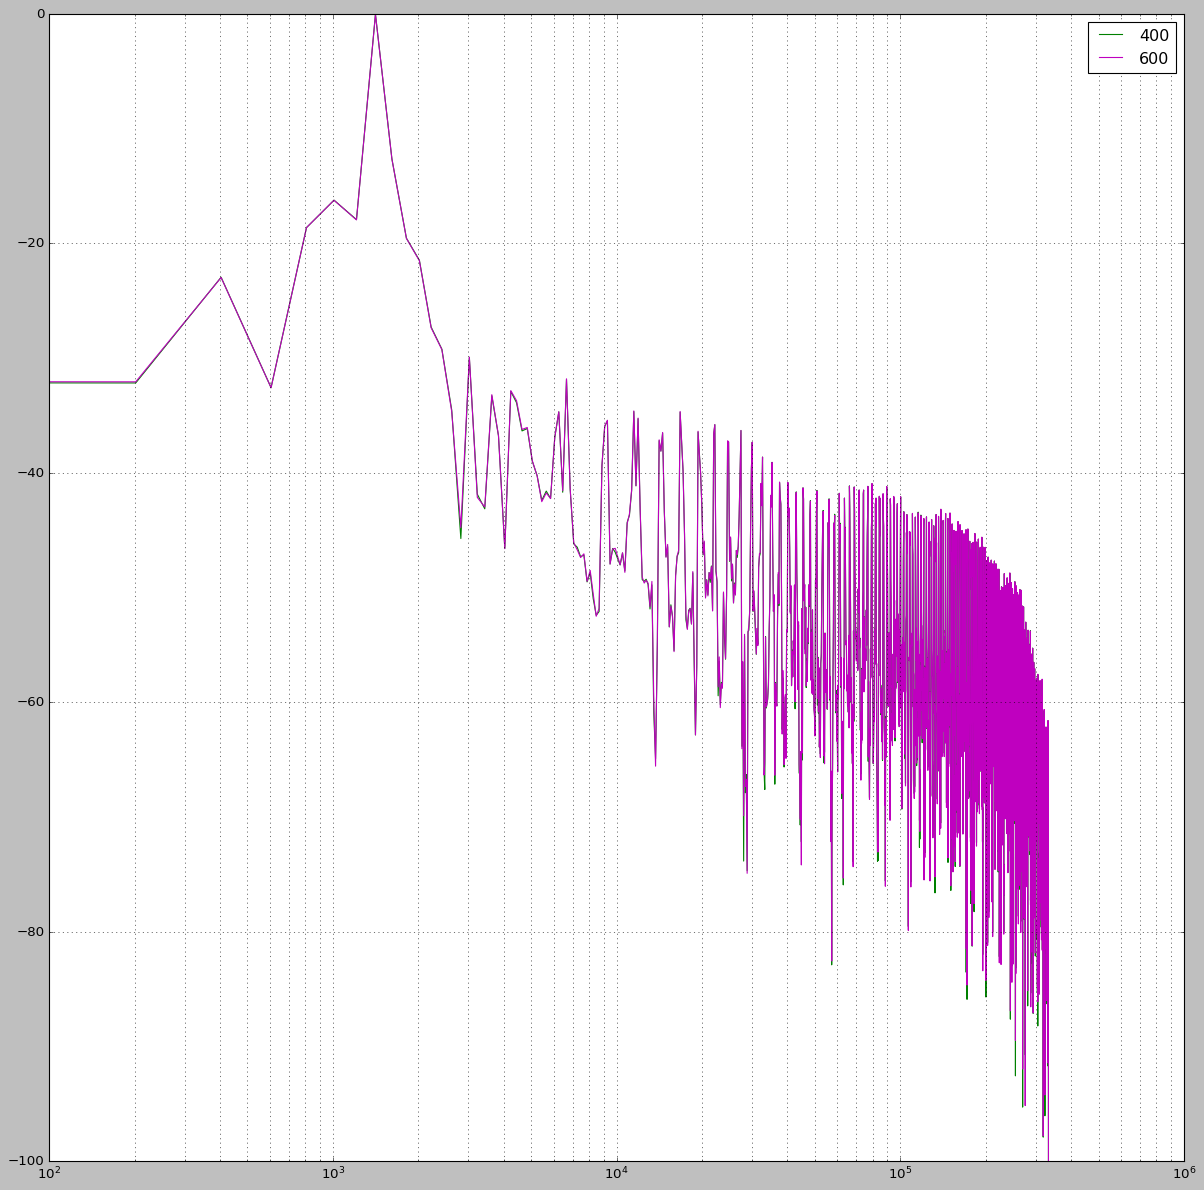

In [109]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_400, 'g', label='400')
plt.semilogx(f,  fft_600, 'm', label='600')
plt.legend()
plt.savefig('accs/pics/pairs/400-600.png')

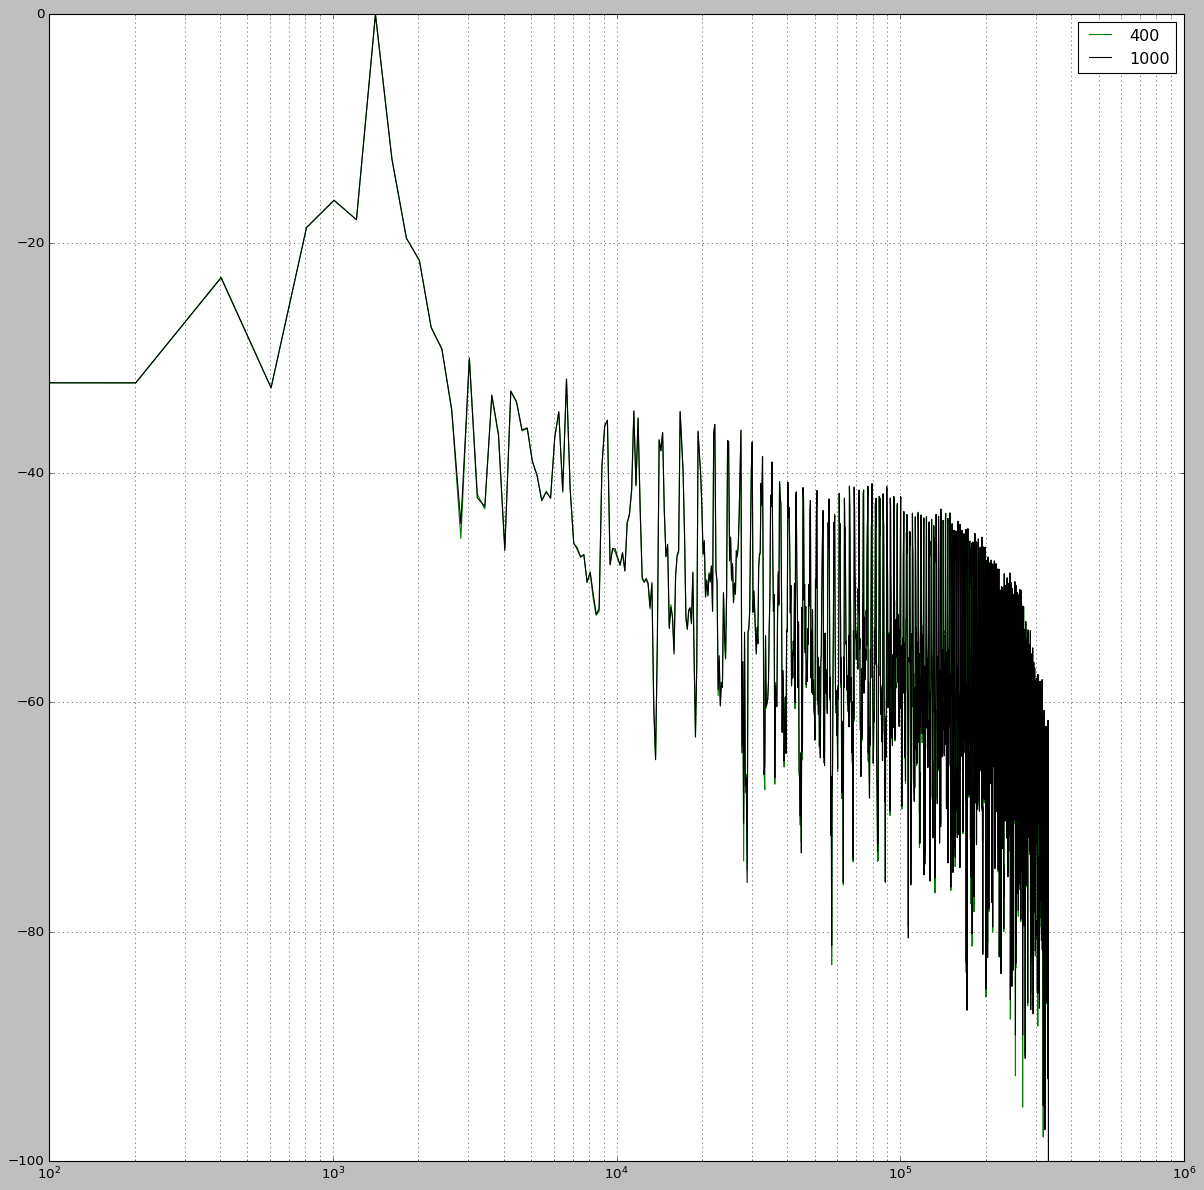

In [110]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_400, 'g', label='400')
plt.semilogx(f, fft_1000, 'k', label='1000')
plt.legend()
plt.savefig('accs/pics/pairs/400-1000.png')

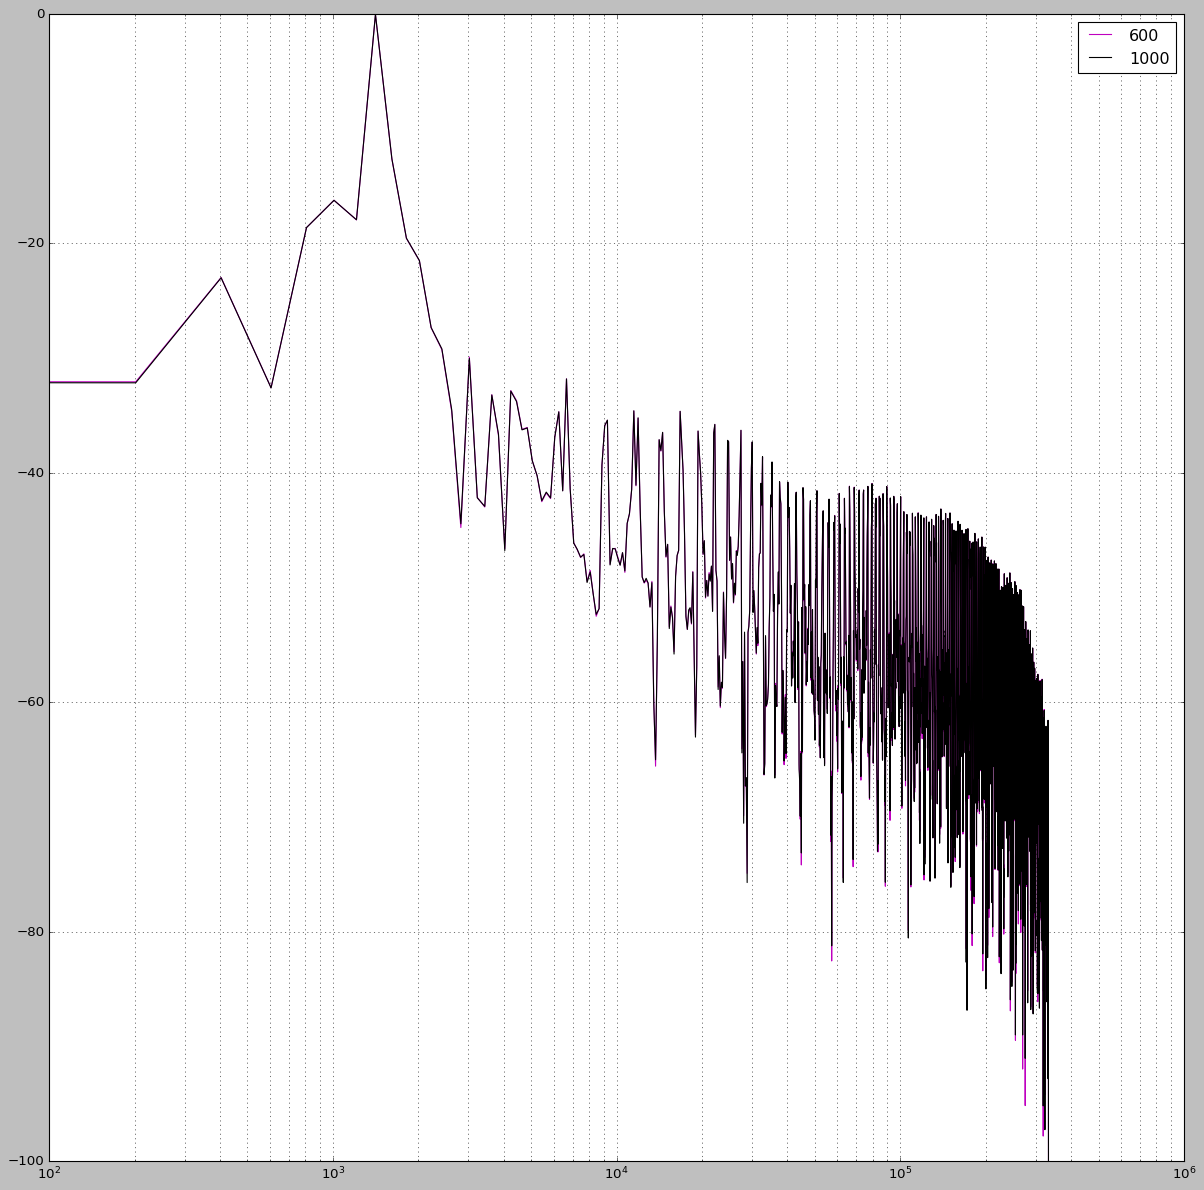

In [111]:
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.tight_layout()
plt.ylim(-100, 0)
plt.semilogx(f,  fft_600, 'm', label='600')
plt.semilogx(f, fft_1000, 'k', label='1000')
plt.legend()
plt.savefig('accs/pics/pairs/600-1000.png')